In [1]:
import os
from PIL import Image, ImageDraw
import numpy as np
import matplotlib.pyplot as plt
from numpy.linalg import norm, pinv
%matplotlib inline
np.set_printoptions(precision=12, suppress=True)

In [2]:
zoomed_coords = True # whether to divide coordinates by SCALE_FAC or not (zoomed coords or not)
center_only = True # use only central stars
SCALE_FAC = 4.0 # Scale factor of coordinates

In [3]:
"""
Load star coords from txt-files
""";

In [4]:
coords_folder = 'data/star_coords/2016nov-11_txt/' # folder with coords files
images_folder = 'data/stars/2016nov-11/'
results_folder = 'results/2016nov-11/exp-Feb-2017'

In [5]:
# 2016nov-11 jpg
fnames = [
    "20161122-191517-359.txt",
    "20161122-201517-375.txt",
    "20161122-211517-375.txt",
    "20161122-221517-375.txt"
]

In [6]:
date = fnames[0][:-4]

In [7]:
im = Image.open(images_folder + "mod_" + date + "-1.jpg")
w, h = im.size
print "Image size:", w, h

Image size: 3072 2304


In [8]:
CENTER_RAD = 1150 # radius(px) of central part
print 'CENTER_RAD:', CENTER_RAD

CENTER_RAD: 1150


In [9]:
x_c, y_c = w/2, h/2 # central point of img
print 'x_c, y_c:', x_c, y_c

x_c, y_c: 1536 1152


"1." Берем область (круг) с центром в середине кадра, разных радиусов.
Считаем количество звезд. Определяем координаты выделенных звезд,
стараясь брать звезды малого размера, занимающих один пиксель.
Число звезд в кругах должно  отличаться на 3-4.

* R1 = 576px; 11 звезд учитыв-ся при подсчете коэфф
* R2 = 476px; 8 звезд учитыв-ся при подсчете коэфф

In [10]:
"""
Choose central stars (in central circle)
""";

In [11]:
coords_list = []
for fname in fnames:
    piece = np.loadtxt(coords_folder + os.sep + fname)
    coords_list.append(piece)

coords = np.vstack(coords_list)
print 'Zoomed In Star coordinates pairs (first 5):\n', coords[:5], '\n'

if zoomed_coords:
    coords /= float(SCALE_FAC)
    coords = coords.round()
    print 'Normal Star coordinates pairs (first 5):\n', coords[:5], '\n'


if center_only:
    coords_center = []
    
    for i in xrange(coords.shape[0]):
        _lx = coords[i, 0]
        _ly = coords[i, 1]
        _rx = coords[i, 2]
        _ry = coords[i, 3]
        if \
        (_lx - x_c)**2 + (_ly - y_c)**2 <= CENTER_RAD**2 and \
        (_rx - x_c)**2 + (_ry - y_c)**2 <= CENTER_RAD**2:
            coords_center.append(coords[i])
    
    coords = np.vstack(coords_center)
    print 'Normal Star coordinates pairs in center:\n', coords, '\n'
    print 'Num of star pairs chosen:', len(coords)

Zoomed In Star coordinates pairs (first 5):
[[  5734.   6266.   6711.   6411.]
 [  6490.   6723.   7468.   6866.]
 [  5934.   7360.   6910.   7507.]
 [  6209.   7975.   7190.   8129.]
 [  9774.   8478.  10880.   8711.]] 

Normal Star coordinates pairs (first 5):
[[ 1434.  1566.  1678.  1603.]
 [ 1622.  1681.  1867.  1716.]
 [ 1484.  1840.  1728.  1877.]
 [ 1552.  1994.  1798.  2032.]
 [ 2444.  2120.  2720.  2178.]] 

Normal Star coordinates pairs in center:
[[ 1434.  1566.  1678.  1603.]
 [ 1622.  1681.  1867.  1716.]
 [ 1484.  1840.  1728.  1877.]
 [ 1552.  1994.  1798.  2032.]
 [  648.  1062.   901.  1108.]
 [  853.   970.  1100.  1015.]
 [ 1231.  1291.  1474.  1328.]
 [ 1438.  1360.  1680.  1397.]
 [ 1338.  1543.  1582.  1579.]
 [ 1436.  1673.  1680.  1709.]
 [  515.   826.   772.   881.]
 [ 2288.  1598.  2548.  1636.]
 [ 2348.  1028.  2604.  1052.]
 [ 1809.  1777.  2057.  1816.]
 [ 2012.  1861.  2264.  1903.]
 [ 2058.  1145.  2304.  1176.]
 [ 2013.   583.  2250.   607.]
 [  972.  1

In [12]:
lX = coords[:, 0] # leftX coordinates
lY = coords[:, 1] # leftY coordinates
rX = coords[:, 2] # rightX coordinates
rY = coords[:, 3] # rightY coordinates

N = coords.shape[0] # number of pairs of points
M = coords.shape[1] # lX, lY, rX, rY == 4
print 'Number of Star coordinates pairs:', N

Number of Star coordinates pairs: 30


In [13]:
# Plot chosen star pairs
scatter_original = Image.new('RGB', (w, h), 'lightgray')
s_pix = scatter_original.load()

ELL_RAD = 3

scx_c = scatter_original.width / 2
scy_c = scatter_original.height / 2
draw = ImageDraw.Draw(scatter_original)
draw.ellipse((scx_c-ELL_RAD, scy_c-ELL_RAD, scx_c+ELL_RAD, scy_c+ELL_RAD), fill='darkgreen')

In [14]:
for i in xrange(N): # draw star points
    draw.ellipse((lX[i]-ELL_RAD, lY[i]-ELL_RAD, lX[i]+ELL_RAD, lY[i]+ELL_RAD), fill='red')
    draw.ellipse((rX[i]-ELL_RAD, rY[i]-ELL_RAD, rX[i]+ELL_RAD, rY[i]+ELL_RAD), fill='blue')

# Draw central part boundary
draw.ellipse((scx_c-CENTER_RAD, scy_c-CENTER_RAD, scx_c+CENTER_RAD, scy_c+CENTER_RAD), outline='black')

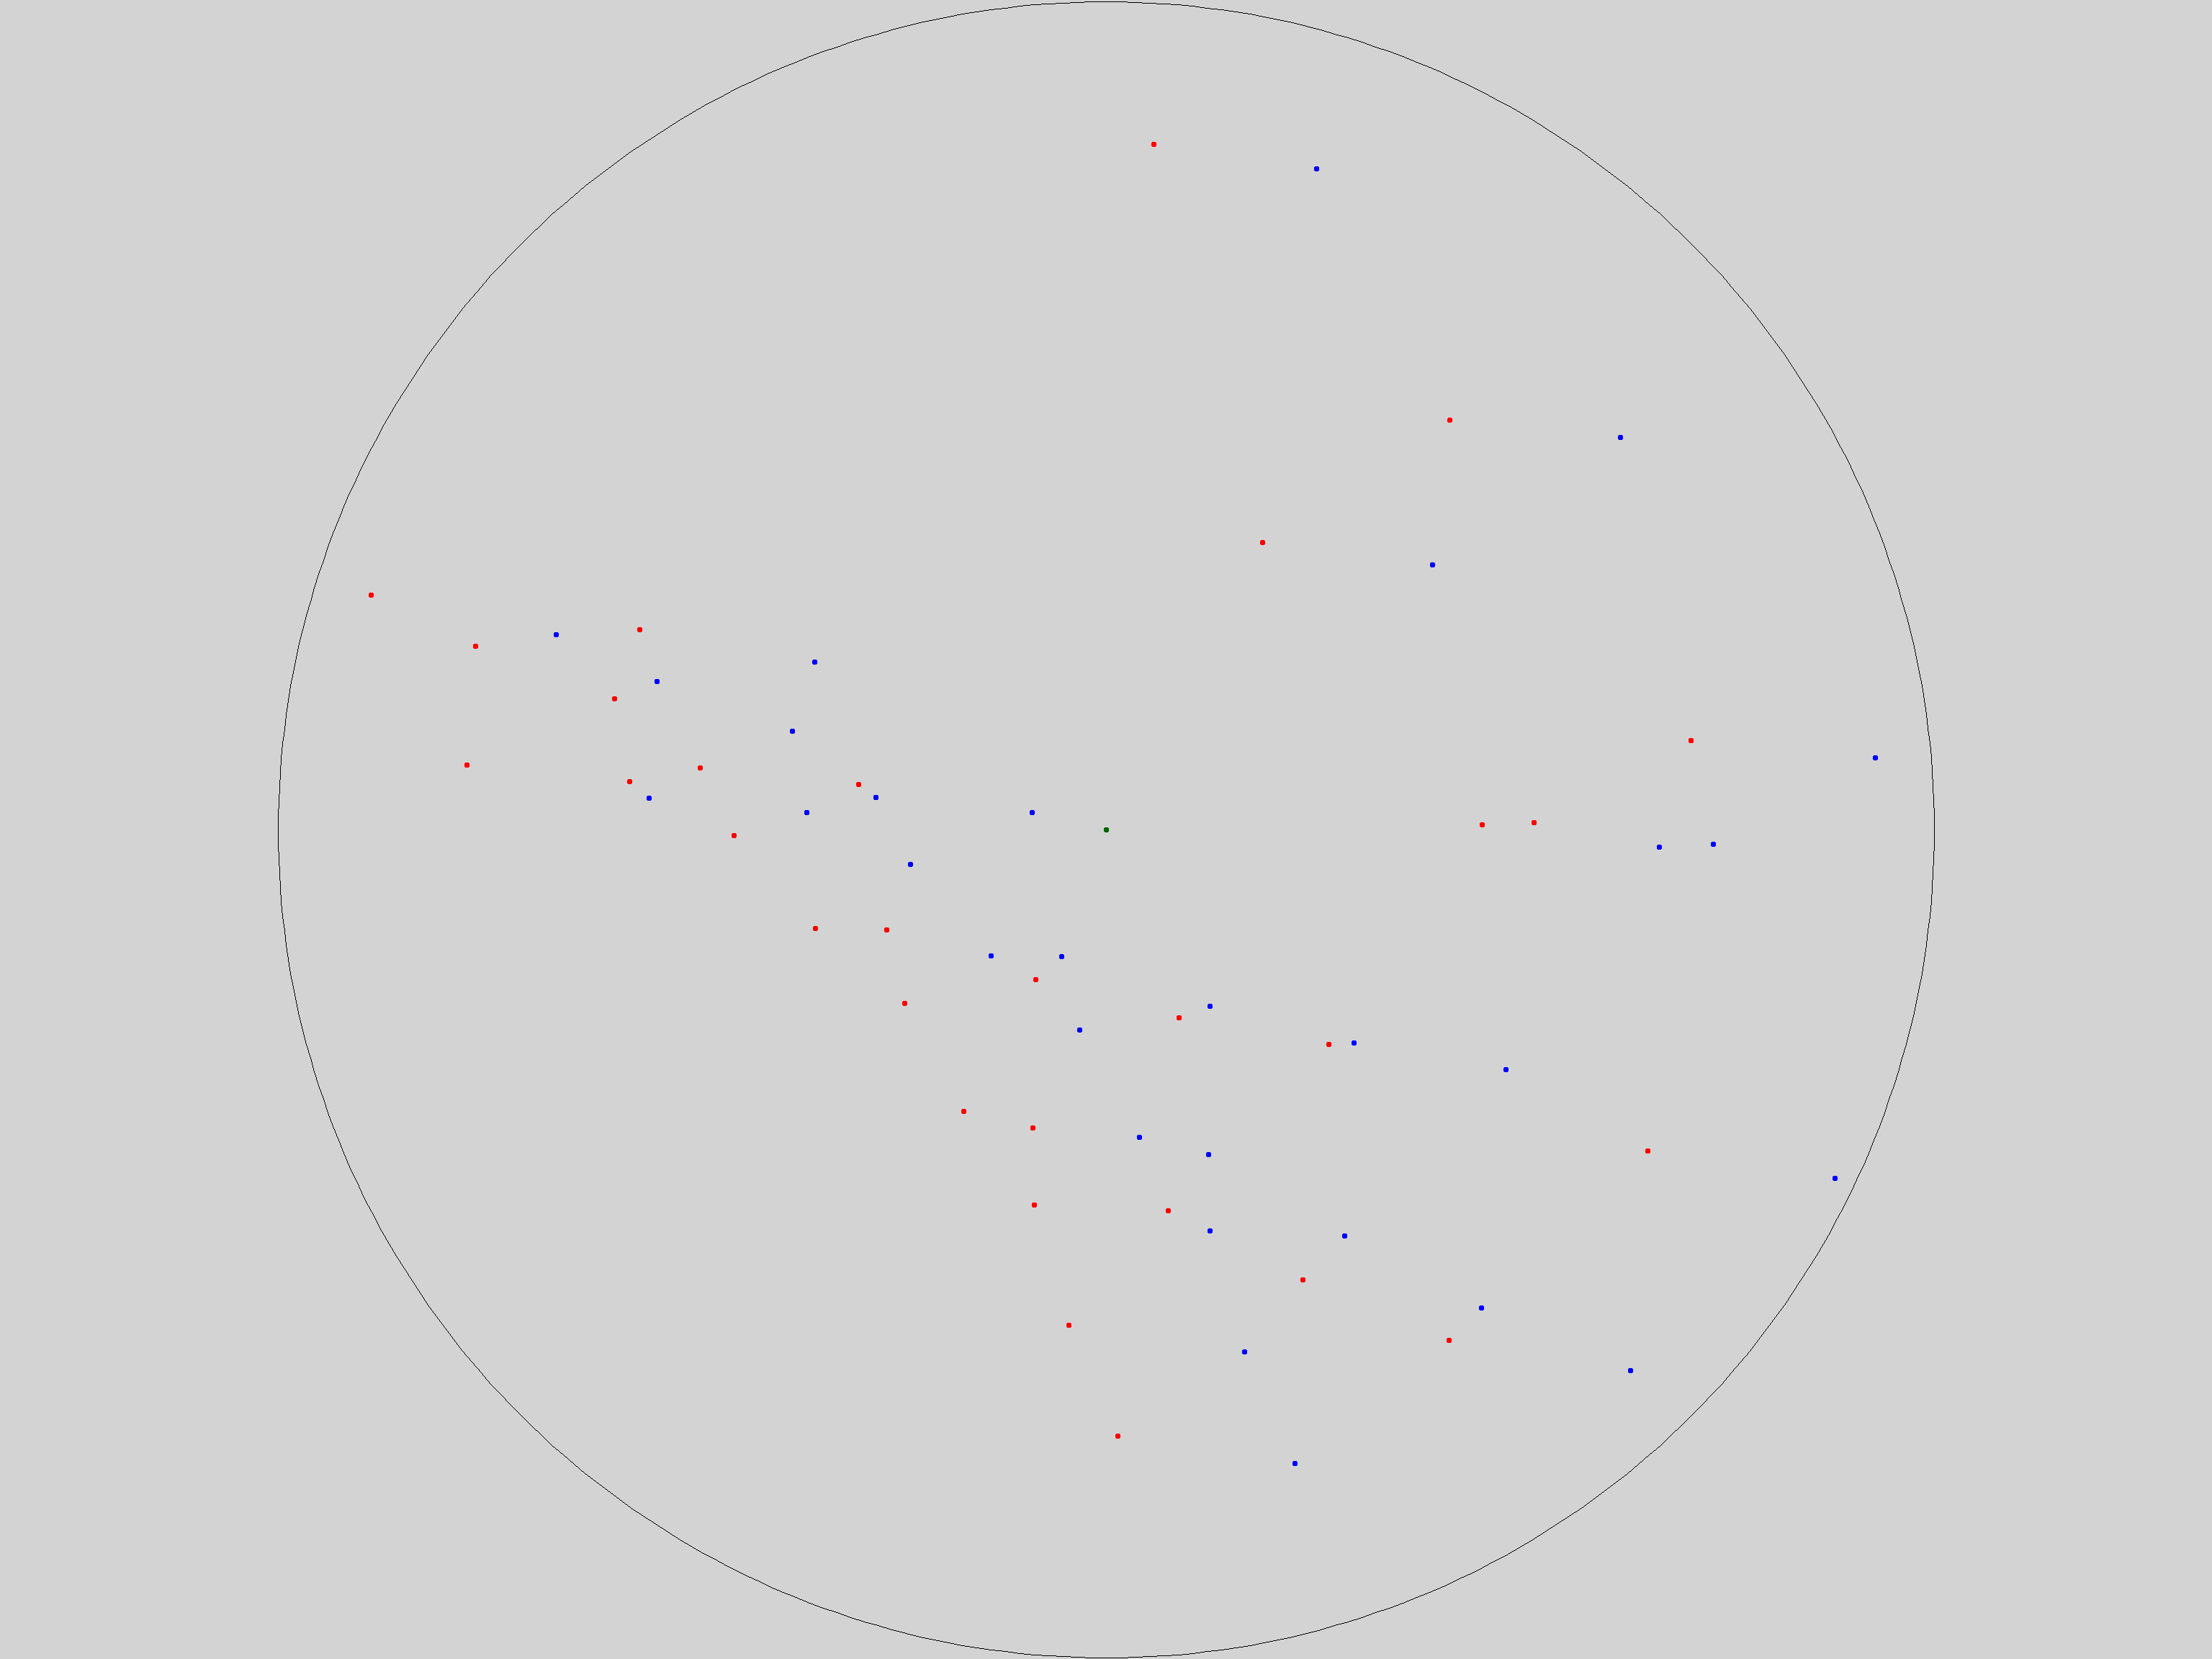

In [15]:
# Original stars' position
scatter_original

"2." Для каждого из набора звезд в выделенных кругах вычисляем
коэффициенты аффинного преобразования, коэффициенты
преобразования аффинного+дисторсии 3 порядка и коэффициенты
преобразования аффинного+дисторсии 3 порядка+дисторсии 5
порядка. Формулу для дисторсии 5 порядка можно посмотреть,
например, на сайте
https://ru.wikipedia.org/wiki/%D0%94%D0%B8%D1%81%D1%82%D0%BE%D1%80%D1%81%D0%B8%D1%8F

Для дисторсии высших порядков  ($F_{n} при \; n>3$) в формулу добавляют по одному слагаемому на каждую дисторсию нечётного порядка ($F_{3}, F_{5}, F_{7} \;$ и т.п.):

$
\vec{R} = b_{0}\vec {r} + F_{3} r^{2} \vec{r} + F_{5} r^{4} \vec{r} + F_{7} r^{6} \vec{r} + \dots
$

и написать по аналогии с третьим порядком. Число звезд должно быть
больше, чем половина числа неизвестных параметров.

Вычисление проводится так.
Запишем схему измерения
$$
\xi = Af + \nu ,
$$

задаем матрицу А, матрицу $\Sigma$, являющуюся диагональной, и на ее
диагонали стоят дисперсии координат вектора погрешности $\nu$ . Здесь $f$ -- вектор неизвестных коэффициентов преобразований. Считаем эти дисперсии равными единице, т.е. $\Sigma = I$ -- единичная матрица

Оценка коэффициентов вычисляется по формуле
$$
    \hat{f} = A^- \xi
$$

In [16]:
xi = np.zeros(2*N)

for i in xrange(N): # fill the xi vector
    xi[2*i] = rX[i]
    xi[2*i + 1] = rY[i]

print 'xi:\n', xi

xi:
[ 1678.  1603.  1867.  1716.  1728.  1877.  1798.  2032.   901.  1108.
  1100.  1015.  1474.  1328.  1680.  1397.  1582.  1579.  1680.  1709.
   772.   881.  2548.  1636.  2604.  1052.  2057.  1816.  2264.  1903.
  2304.  1176.  2250.   607.  1216.  1107.  1433.  1128.  1376.  1327.
  1499.  1430.  1880.  1448.  2091.  1485.  2379.  1172.  1989.   784.
  1828.   234.   912.   946.  1131.   919.  1120.  1128.  1264.  1200.]


In [17]:
"""
Calculate coeff-s

a) Affine (at least 3 stars)
""";

In [18]:
k = 6 # num of coeff-s

z = np.zeros(k)
arr = np.zeros((2*N, k)) # matrix A

In [19]:
for i in xrange(N): # fill the A matrix
    
    arr[2*i] = [lX[i], lY[i], 0, 0, 1, 0]

    arr[2*i + 1] = [0, 0, lX[i], lY[i], 0, 1]

In [20]:
np.set_printoptions(precision=2, suppress=True)
print 'A:\n', arr[:4], '\n'
np.set_printoptions(precision=12, suppress=True)

A:
[[ 1434.  1566.     0.     0.     1.     0.]
 [    0.     0.  1434.  1566.     0.     1.]
 [ 1622.  1681.     0.     0.     1.     0.]
 [    0.     0.  1622.  1681.     0.     1.]] 



In [21]:
p_arr = pinv(arr)
z = np.dot(p_arr, xi)
print """
Affine coefficients:
%.4f %.4f %.4f %.4f 
%.2f %.2f""" % tuple(z)
print 'cond(A): ', np.linalg.cond(arr)


Affine coefficients:
0.9988 0.0061 -0.0112 1.0035 
239.62 49.48
cond(A):  7795.97809823


In [22]:
"""
b) Affine + Ditortion 3rd order 
  (at least 4 stars)
""";

In [23]:
k3 = 8

z3 = np.zeros(k3)
arr3 = np.zeros((2*N, k3)) # matrix A

In [24]:
for i in xrange(N): # fill the A matrix
    dist_l = (lX[i]-x_c)**2 + (lY[i]-y_c)**2
    dist_r = (rX[i]-x_c)**2 + (rY[i]-y_c)**2

    zx1 = (lX[i] - x_c) * dist_l
    zx2 = (rX[i] - x_c) * dist_r
    arr3[2*i] = [lX[i], lY[i], 0, 0, 1, 0, -zx1, zx2]

    zy1 = (lY[i] - y_c) * dist_l
    zy2 = (rY[i] - y_c) * dist_r
    arr3[2*i + 1] = [0, 0, lX[i], lY[i], 0, 1, -zy1, zy2]


In [25]:
np.set_printoptions(precision=2)
print 'A:\n', arr3[:4], '\n'
np.set_printoptions(precision=4)

A:
[[  1.43e+03   1.57e+03   0.00e+00   0.00e+00   1.00e+00   0.00e+00
    1.85e+07   3.17e+07]
 [  0.00e+00   0.00e+00   1.43e+03   1.57e+03   0.00e+00   1.00e+00
   -7.53e+07   1.01e+08]
 [  1.62e+03   1.68e+03   0.00e+00   0.00e+00   1.00e+00   0.00e+00
   -2.47e+07   1.42e+08]
 [  0.00e+00   0.00e+00   1.62e+03   1.68e+03   0.00e+00   1.00e+00
   -1.52e+08   2.41e+08]] 



In [26]:
p_arr3 = pinv(arr3)
z3 = np.dot(p_arr3, xi)
print """
Affine coefficients + Ditortion 3rd order: 
%.4f %.4f %.4f %.4f 
%.2f %.2f 
%.2e %.2e""" % tuple(z3)
print 'cond(A): ', np.linalg.cond(arr3)


Affine coefficients + Ditortion 3rd order: 
0.9937 0.0099 -0.0108 0.9982 
234.92 53.77 
2.88e-08 3.19e-08
cond(A):  5655698406.99


In [27]:
"""
c) Affine + Ditortion 3rd, 5th orders 
  (at least 5 stars)
""";

In [28]:
k35 = 10

z35 = np.zeros(k35)
arr35 = np.zeros((2*N, k35)) # matrix A

In [29]:
for i in xrange(N): # fill the A matrix
    dist_l = (lX[i]-x_c)**2 + (lY[i]-y_c)**2
    dist_r = (rX[i]-x_c)**2 + (rY[i]-y_c)**2

    zx1 = (lX[i] - x_c) * dist_l
    zx2 = (rX[i] - x_c) * dist_r
    wx1 = (lX[i] - x_c) * dist_l**2
    wx2 = (rX[i] - x_c) * dist_r**2

    arr35[2*i] = [lX[i], lY[i], 0, 0, 1, 0, -zx1, zx2, -wx1, wx2]

    zy1 = (lY[i] - y_c) * dist_l
    zy2 = (rY[i] - y_c) * dist_r
    wy1 = (lY[i] - y_c) * dist_l**2
    wy2 = (rY[i] - y_c) * dist_r**2

    arr35[2*i + 1] = [0, 0, lX[i], lY[i], 0, 1, -zy1, zy2, -wy1, wy2]


In [30]:
np.set_printoptions(precision=2, suppress=True)
print 'A:\n', arr35[:4], '\n'

A:
[[  1.43e+03   1.57e+03   0.00e+00   0.00e+00   1.00e+00   0.00e+00
    1.85e+07   3.17e+07   3.37e+12   7.10e+12]
 [  0.00e+00   0.00e+00   1.43e+03   1.57e+03   0.00e+00   1.00e+00
   -7.53e+07   1.01e+08  -1.37e+13   2.25e+13]
 [  1.62e+03   1.68e+03   0.00e+00   0.00e+00   1.00e+00   0.00e+00
   -2.47e+07   1.42e+08  -7.10e+12   6.05e+13]
 [  0.00e+00   0.00e+00   1.62e+03   1.68e+03   0.00e+00   1.00e+00
   -1.52e+08   2.41e+08  -4.36e+13   1.03e+14]] 



In [31]:
p_arr35 = pinv(arr35, rcond=1e-18)
z35 = np.dot(p_arr35, xi)
np.set_printoptions(precision=4)
print """
Affine coefficients + Ditortion 3rd, 5th orders:

%.4f %.4f %.4f %.4f 
%.2f %.2f 
%.2e %.2e 
%.2e %.2e""" % tuple(z35)
print 'cond(A): ', np.linalg.cond(arr35)


Affine coefficients + Ditortion 3rd, 5th orders:

0.9926 0.0098 -0.0108 0.9970 
236.99 55.18 
2.15e-08 2.98e-08 
5.50e-15 1.06e-15
cond(A):  9.50761954282e+15


Погрешность оценки коэффициентов определяется матрицей
$$
    \Sigma_f = \left( A \Sigma A^* \right)^{-1} 
             = \left(A A^* \right)^{-1}
$$

In [32]:
"""
Calculate error matrix \Sigma_f
""";

[[ -5.9109e+09   0.0000e+00   7.1556e+09   0.0000e+00]
 [  0.0000e+00  -5.9109e+09   0.0000e+00   7.1556e+09]
 [  2.3217e+09   0.0000e+00  -3.0217e+09   0.0000e+00]
 [  0.0000e+00   2.3217e+09   0.0000e+00  -3.0217e+09]]


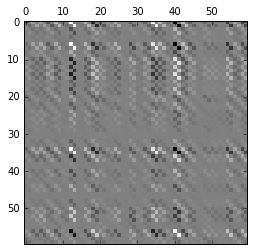

In [33]:
sig_mat = np.linalg.inv(np.dot(arr, arr.T))
plt.matshow(sig_mat, cmap=plt.cm.gray)
np.set_printoptions(suppress=False)
print sig_mat[:4, :4]

[[  2.0580e+00  -1.2053e-02  -3.8448e-02   1.4495e-01]
 [ -1.8135e-01  -1.6851e-01   8.8175e-02   2.6829e-02]
 [  3.7651e-02   3.1254e-02   2.2663e-02  -2.6920e-02]
 [  5.7448e-02  -4.5597e-02  -2.0058e-03   3.3492e-02]]


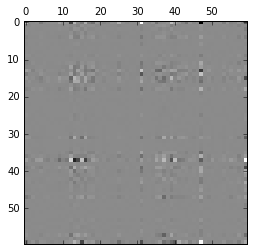

In [34]:
sig_mat3 = np.linalg.inv(np.dot(arr3, arr3.T))
plt.matshow(sig_mat3, cmap=plt.cm.gray)
np.set_printoptions(suppress=False)
print sig_mat3[:4, :4]

[[ -1.7996e-10  -3.8858e-11  -8.6229e-11  -1.0790e-11]
 [  3.8178e-11   6.7003e-12   1.6086e-11   2.0225e-12]
 [  3.8393e-11   6.3566e-12   1.6137e-11   2.3599e-12]
 [  1.7296e-12   8.5783e-13   8.5069e-13  -6.7556e-15]]


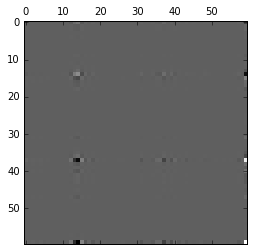

In [35]:
sig_mat35 = np.linalg.inv(np.dot(arr35, arr35.T))
plt.matshow(sig_mat35, cmap=plt.cm.gray)
np.set_printoptions(suppress=False)
print sig_mat35[:4, :4]

Надежность модели определяется значением случайной величины
$$
    \tau = \| \xi - AA^{-} \xi \|^2
$$

In [36]:
"""
Calculate reliability of model \tau,
(2N - k) / tau,
N -- number of central stars 
k -- number of coefficients(6, 8 or 10)
""";

In [37]:
N

30

In [38]:
tau = np.linalg.norm(xi - arr.dot(p_arr).dot(xi) ) ** 2
print "tau:", tau
print "(2N - k) / tau:", (2*N - k) / tau

tau: 1433.441727
(2N - k) / tau: 0.0376715697492


In [39]:
tau3 = np.linalg.norm(xi - arr3.dot(p_arr3).dot(xi) ) ** 2
print "tau3:", tau3
print "(2N - k3) / tau3:", (2*N - k3) / tau3

tau3: 229.95412582
(2N - k3) / tau3: 0.226132059229


In [40]:
tau35 = np.linalg.norm(xi - arr35.dot(p_arr35).dot(xi) ) ** 2
print "tau35:", tau35
print "(2N - k35) / tau35:", (2*N - k35) / tau35

tau35: 227.484927492
(2N - k35) / tau35: 0.219794781796


Выходные данные программы:

1) N – число звезд в круге

2) оценка коэффициентов $\; \hat{f} = A^- \xi$

3) матрица ошибок $\; \Sigma_f$

4) значение $\; \tau$ , а лучше – значение $\; \frac{2N - k}{\tau}$,
где k -- число коэффициентов (координат вектора f).

"3." Вычисляем преобразованное изображение одного из кадров и
накладываем его на изображение второго кадра. Для каждой звезды
вычисляем разность координат (по x и по y) двух (совмещенных) изображений звезд.

In [41]:
def affine_transform_point(x, y):
    return [b * y + x * a + e , d * y + x * c + f]

In [42]:
"""
Align images and blend

a) Affine
""";

In [43]:
a = float(z[0])
b = float(z[1])
c = float(z[2])
d = float(z[3])
e = float(z[4])
f = float(z[5])

In [44]:
nlX = np.zeros_like(lX)
nlY = np.zeros_like(lY)

In [45]:
# Calc new (affine transformed) points
for i in xrange(N): 
    nlX[i], nlY[i] = affine_transform_point(lX[i], lY[i])

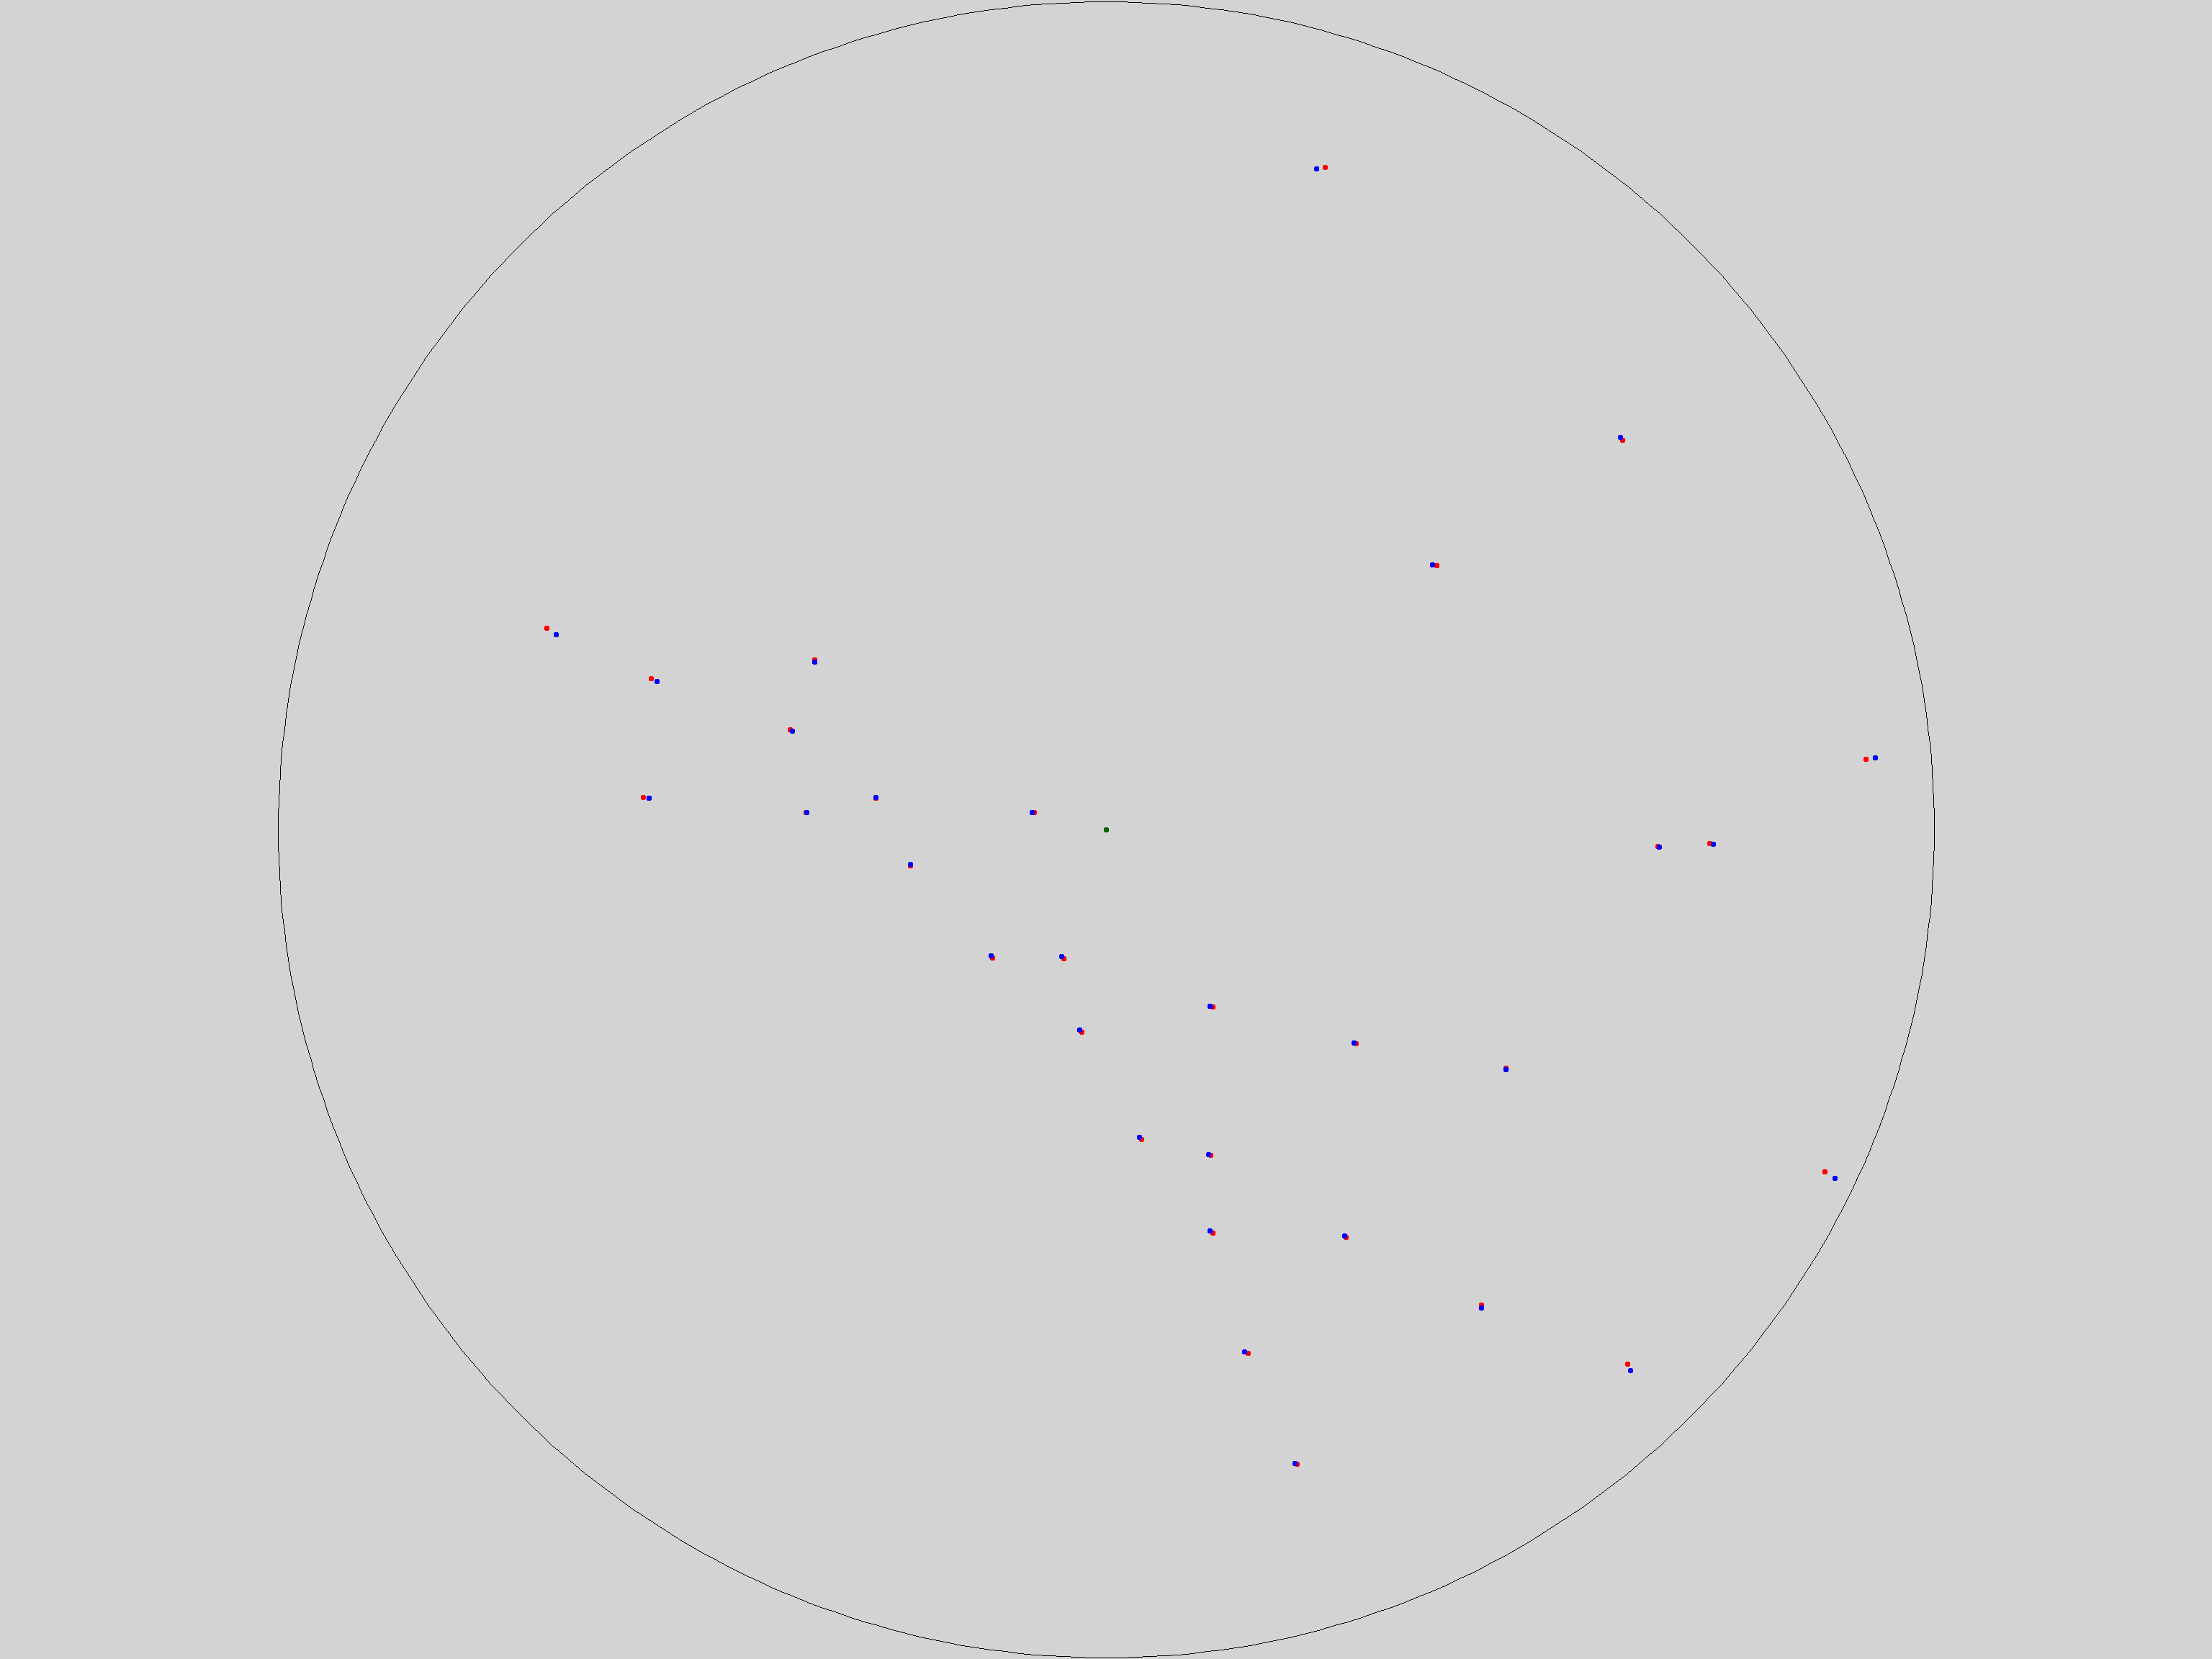

In [46]:
scatter = Image.new('RGB', (w, h), 'lightgray')


draw = ImageDraw.Draw(scatter)
draw.ellipse((x_c-ELL_RAD, y_c-ELL_RAD, x_c+ELL_RAD, y_c+ELL_RAD), fill='darkgreen')
# Draw central part boundary
draw.ellipse((x_c-CENTER_RAD, y_c-CENTER_RAD, x_c+CENTER_RAD, y_c+CENTER_RAD), outline='black')

for i in xrange(N): # draw star points
    draw.ellipse((nlX[i]-ELL_RAD, nlY[i]-ELL_RAD, nlX[i]+ELL_RAD, nlY[i]+ELL_RAD), fill='red')
    draw.ellipse((rX[i]-ELL_RAD, rY[i]-ELL_RAD, rX[i]+ELL_RAD, rY[i]+ELL_RAD), fill='blue')
scatter

In [47]:
"""
b) Affine + Ditortion3
""";

In [48]:
a = float(z3[0])
b = float(z3[1])
c = float(z3[2])
d = float(z3[3])
e = float(z3[4])
f = float(z3[5])

eps1 = float(z3[6])
eps2 = float(z3[7])

In [49]:
nlX3 = np.zeros_like(lX)
nlY3 = np.zeros_like(lY)
nrX3 = np.zeros_like(rX)
nrY3 = np.zeros_like(rY)

In [50]:
# Get rid of distortions on new left Img
for i in xrange(N): 
    dist_l = (lX[i] - x_c)**2 + (lY[i] - y_c)**2

    zx1 = (lX[i] - x_c) * dist_l
    zy1 = (lY[i] - y_c) * dist_l


    nlX3[i] = lX[i] - eps1 * zx1
    nlY3[i] = lY[i] - eps1 * zy1


# Get rid of distortions on new right Img

for i in xrange(N): 
    dist_r = (rX[i] - x_c)**2 + (rY[i] - y_c)**2

    zx2 = (rX[i] - x_c) * dist_r
    zy2 = (rY[i] - y_c) * dist_r


    nrX3[i] = rX[i] - eps2 * zx2
    nrY3[i] = rY[i] - eps2 * zy2


In [51]:
# Calc new (affine transformed) points
for i in xrange(N): 
    nlX3[i], nlY3[i] = affine_transform_point(lX[i], lY[i])

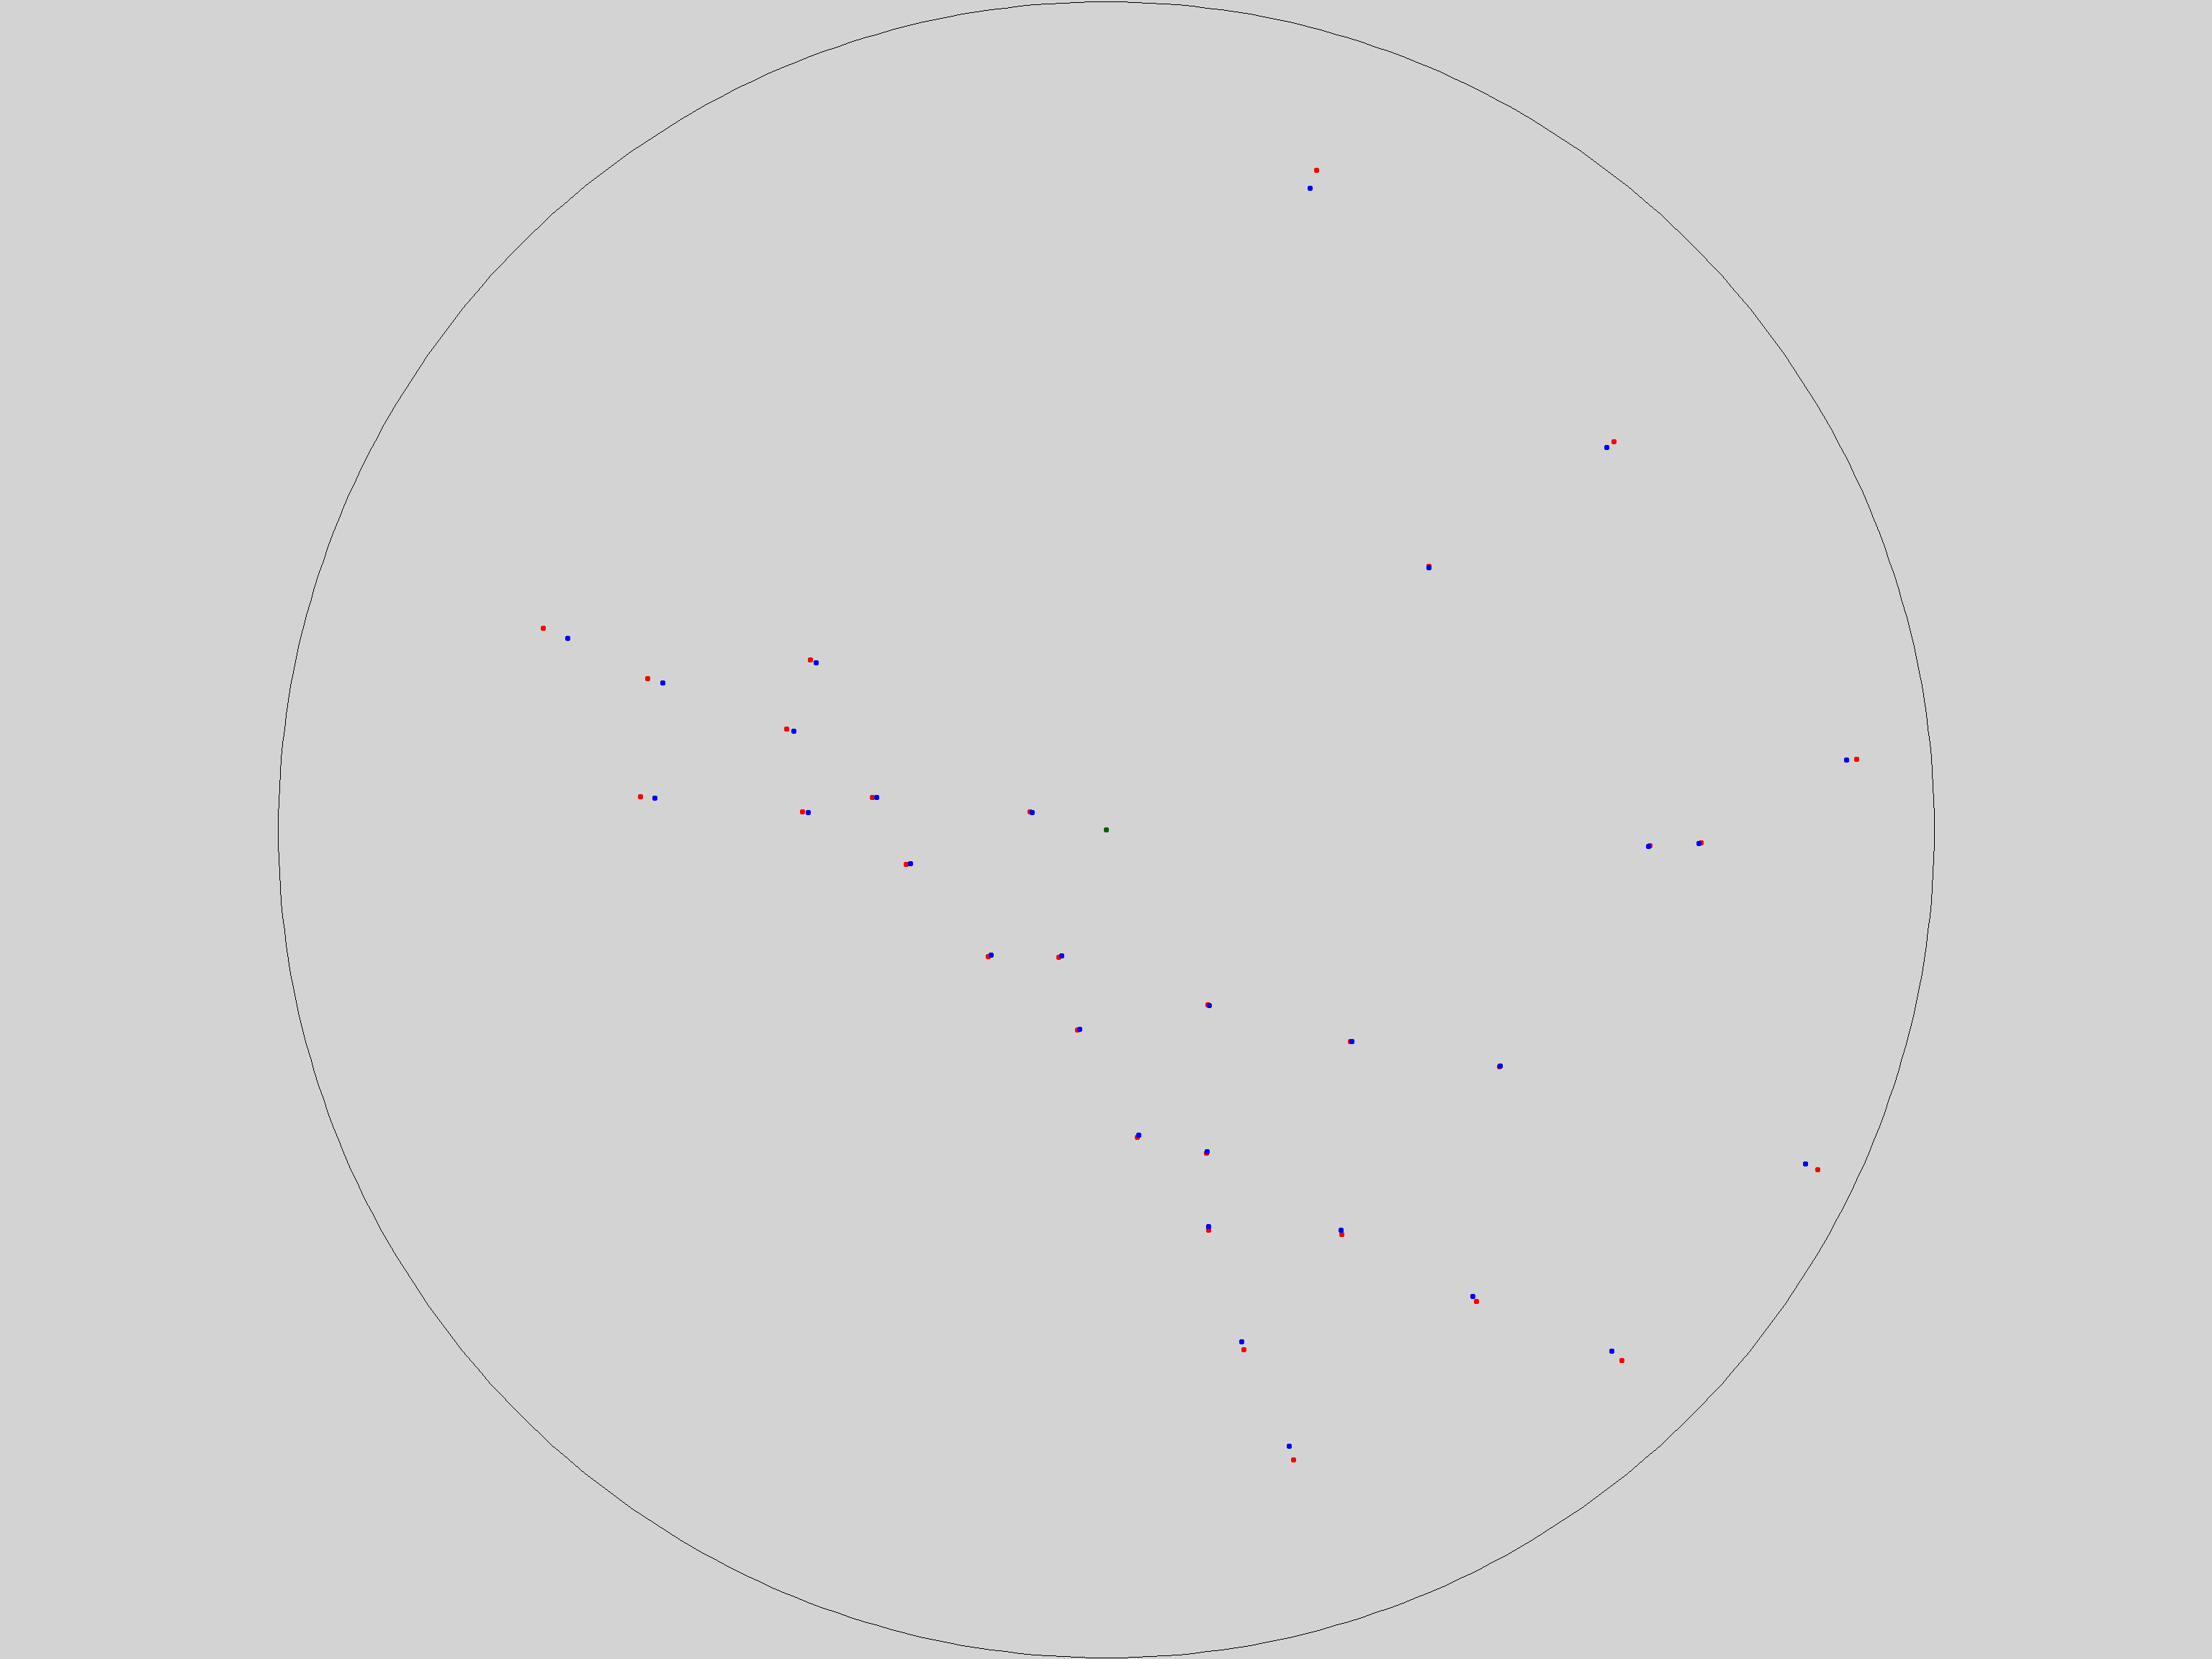

In [52]:
scatter3 = Image.new('RGB', (w, h), 'lightgray')


draw = ImageDraw.Draw(scatter3)
draw.ellipse((x_c-ELL_RAD, y_c-ELL_RAD, x_c+ELL_RAD, y_c+ELL_RAD), fill='darkgreen')
# Draw central part boundary
draw.ellipse((x_c-CENTER_RAD, y_c-CENTER_RAD, x_c+CENTER_RAD, y_c+CENTER_RAD), outline='black')

for i in xrange(N): # draw star points
    draw.ellipse((nlX3[i]-ELL_RAD, nlY3[i]-ELL_RAD, nlX3[i]+ELL_RAD, nlY3[i]+ELL_RAD), fill='red')
    draw.ellipse((nrX3[i]-ELL_RAD, nrY3[i]-ELL_RAD, nrX3[i]+ELL_RAD, nrY3[i]+ELL_RAD), fill='blue')
scatter3

In [53]:
"""
c) Affine + Ditortion3,5
""";

In [54]:
a = float(z35[0])
b = float(z35[1])
c = float(z35[2])
d = float(z35[3])
e = float(z35[4])
f = float(z35[5])

eps1 = float(z35[6])
eps2 = float(z35[7])
eps3 = float(z35[8])
eps4 = float(z35[9])

In [55]:
nlX35 = np.zeros_like(lX)
nlY35 = np.zeros_like(lY)
nrX35 = np.zeros_like(rX)
nrY35 = np.zeros_like(rY)

In [56]:
# Get rid of distortions on new left Img
for i in xrange(N): 
    dist_l = (lX[i] - x_c)**2 + (lY[i] - y_c)**2

    zx1 = (lX[i] - x_c) * dist_l
    zy1 = (lY[i] - y_c) * dist_l
    wx1 = (lX[i] - x_c) * dist_l**2
    wy1 = (lY[i] - y_c) * dist_l**2

    
    nlX35[i] = lX[i] - eps1 * zx1 - eps3 * wx1
    nlY35[i] = lY[i] - eps1 * zy1 - eps3 * wy1


# Get rid of distortions on new right Img

for i in xrange(N): 
    dist_r = (rX[i] - x_c)**2 + (rY[i] - y_c)**2

    zx2 = (rX[i] - x_c) * dist_r
    zy2 = (rY[i] - y_c) * dist_r
    wx2 = (rX[i] - x_c) * dist_r**2
    wy2 = (rY[i] - y_c) * dist_r**2


    nrX35[i] = rX[i] - eps2 * zx2 - eps4 * wx2
    nrY35[i] = rY[i] - eps2 * zy2 - eps4 * wy2


In [57]:
# Calc new (affine transformed) points
for i in xrange(N): 
    nlX35[i], nlY35[i] = affine_transform_point(lX[i], lY[i])

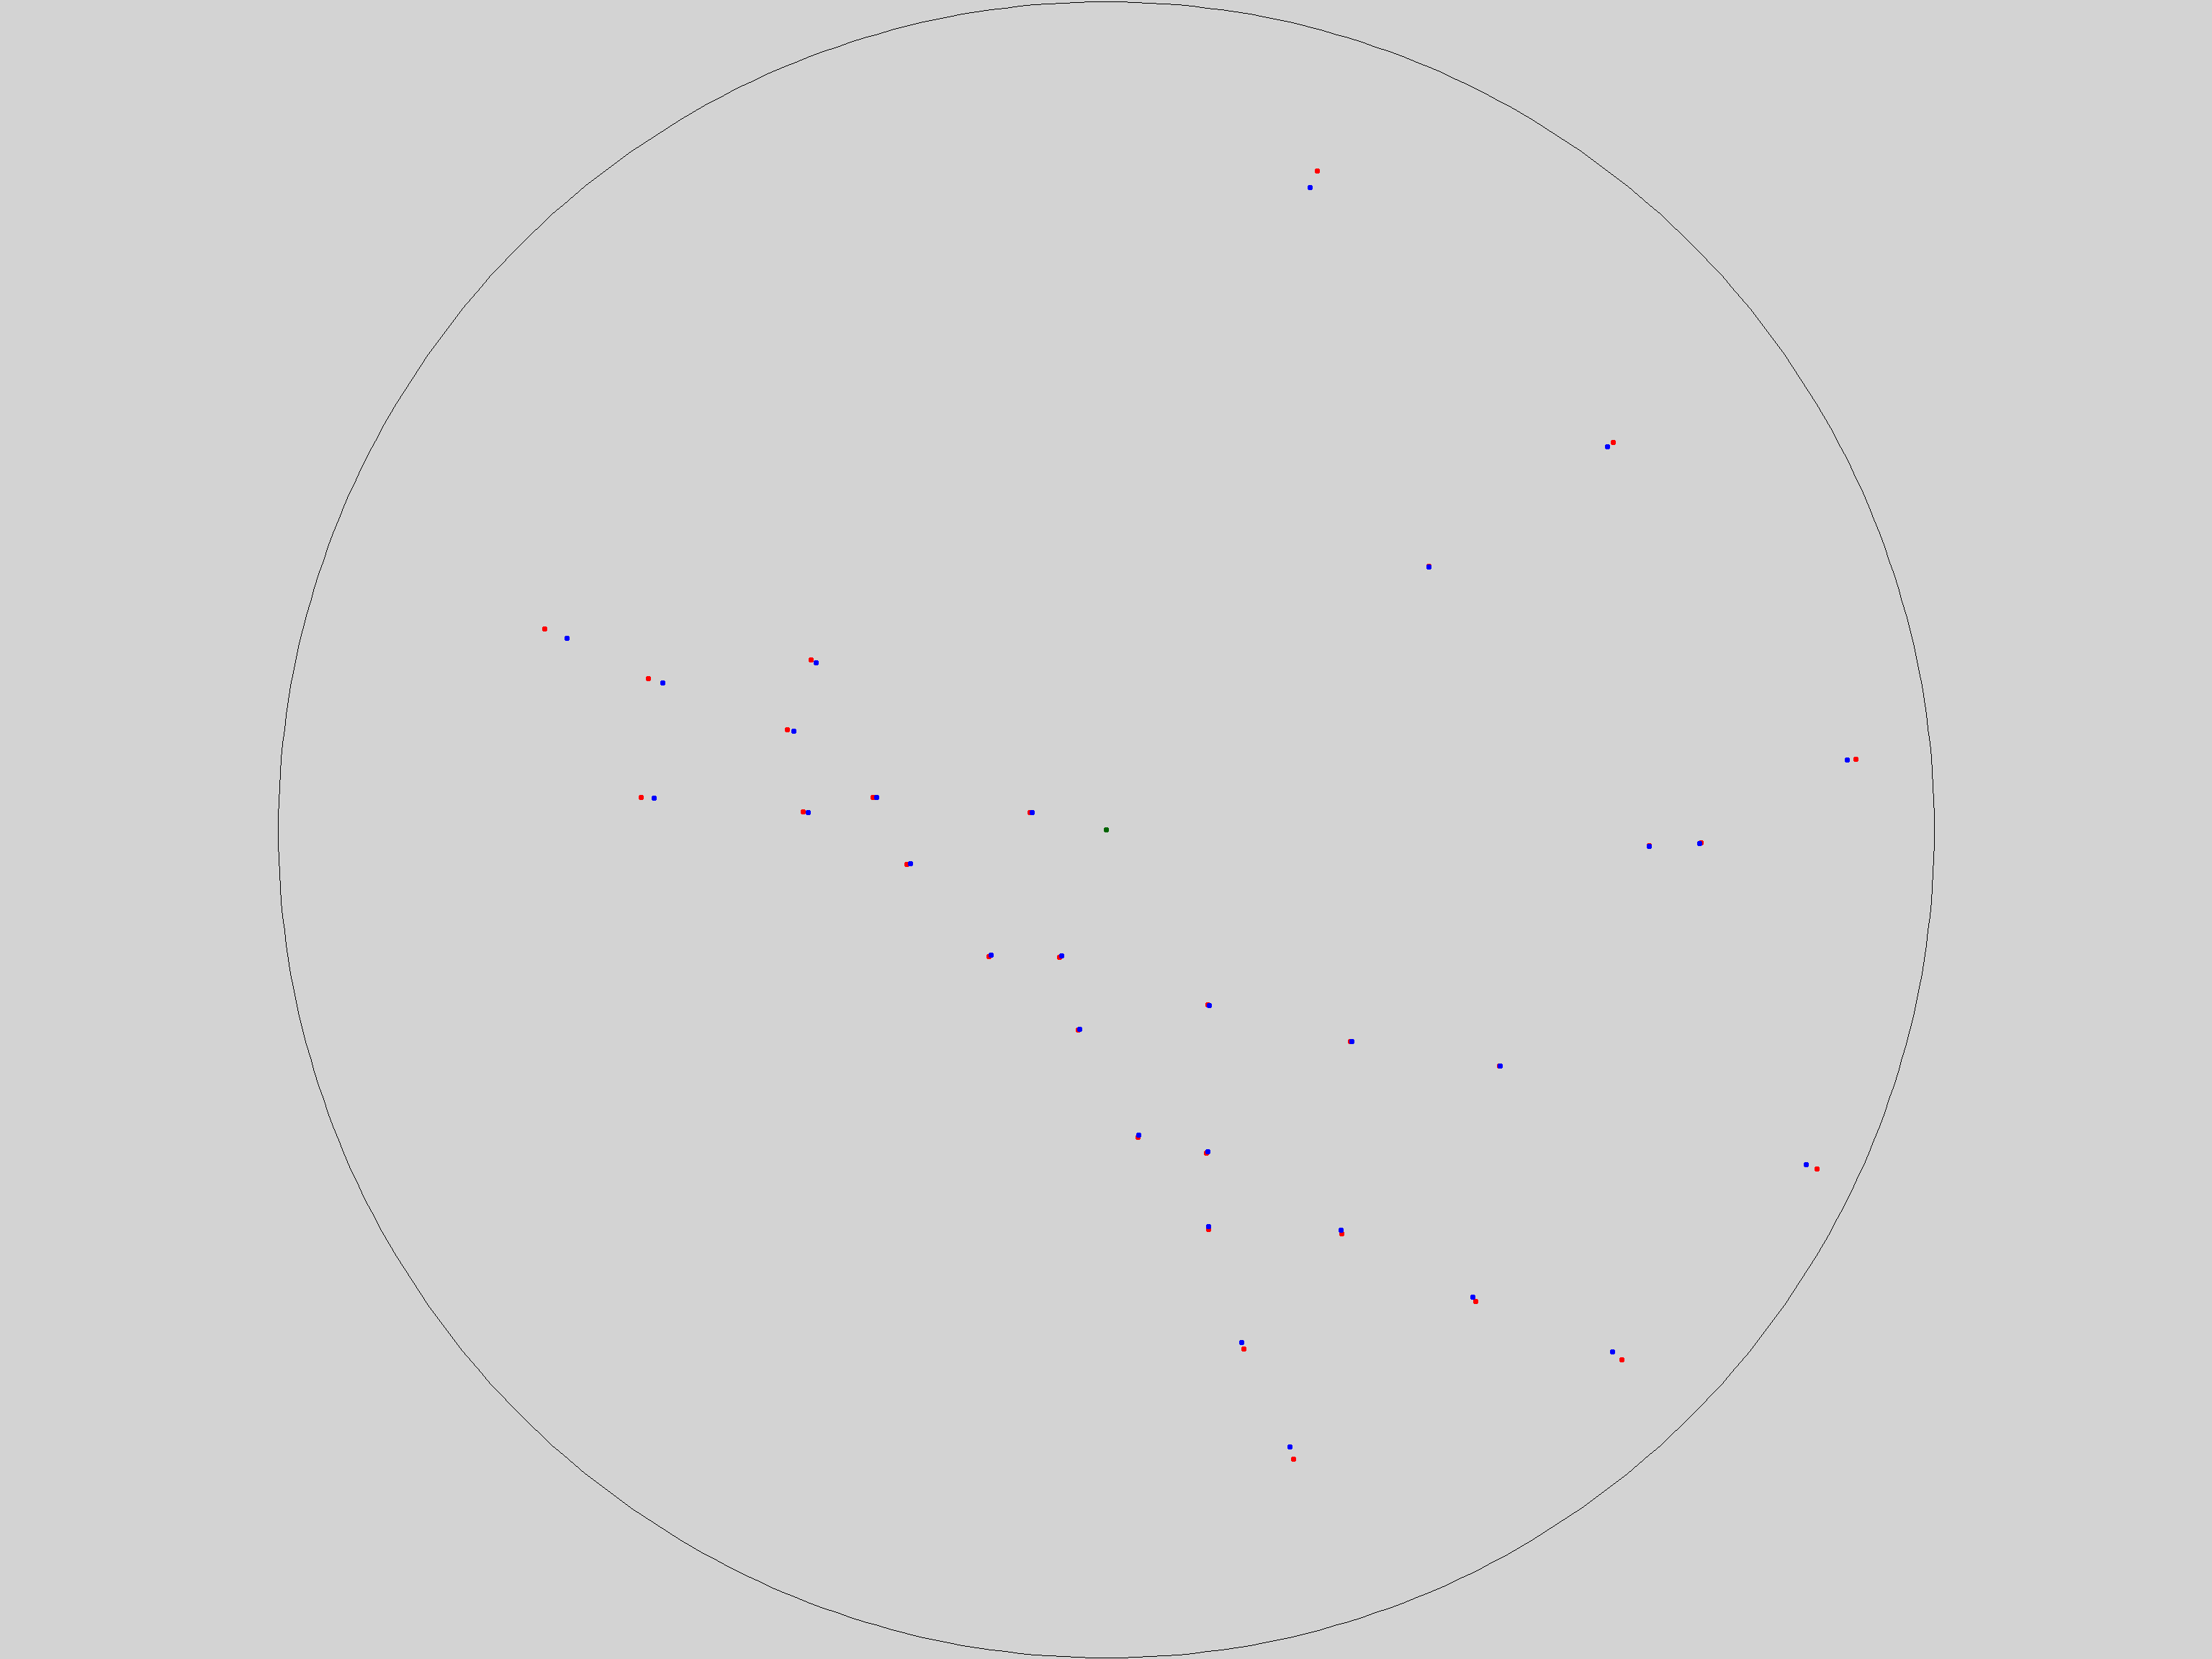

In [58]:
scatter35 = Image.new('RGB', (w, h), 'lightgray')


draw = ImageDraw.Draw(scatter35)
draw.ellipse((x_c-ELL_RAD, y_c-ELL_RAD, x_c+ELL_RAD, y_c+ELL_RAD), fill='darkgreen')
# Draw central part boundary
draw.ellipse((x_c-CENTER_RAD, y_c-CENTER_RAD, x_c+CENTER_RAD, y_c+CENTER_RAD), outline='black')

for i in xrange(N): # draw star points
    draw.ellipse((nlX35[i]-ELL_RAD, nlY35[i]-ELL_RAD, nlX35[i]+ELL_RAD, nlY35[i]+ELL_RAD), fill='red')
    draw.ellipse((nrX35[i]-ELL_RAD, nrY35[i]-ELL_RAD, nrX35[i]+ELL_RAD, nrY35[i]+ELL_RAD), fill='blue')
scatter35

Выходные данные программы:

1) $\Delta x_i, \Delta y_i, \; i = 1,N$

2) $\sigma^2 = \frac{1}{N} \sum\limits_{i=1}^{N} 
                \left( \Delta x_i^2 + \Delta y_i^2 \right)$
                
3) $ 
     M_x = \max\limits_{i=1,N} \{\Delta x_i\}, \;
     M_y = \max\limits_{i=1,N} \{\Delta y_i\}, \;
     M = \max\{M_x, M_y\}
   $                

In [59]:
"""
For all stars -- calculate distance (by x, by y) 
between corresponding stars on aligned images:
\Delta_x, \Delta_y;
\sigma^2;
M_x, M_y, M
""";

In [60]:
"""
a) Affine
""";

In [61]:
delX = np.zeros_like(nlX)
delY = np.zeros_like(nlY)

In [62]:
delX = abs(nlX - rX)
delY = abs(nlY - rY)
print "delX:", delX
print "delY:", delY

delX: [  3.4437   2.9169   5.0576   3.9159   7.6769   2.4898   3.0106   4.1795
   3.4204   4.0953  12.9571  13.4043  12.9621   0.2753   3.4593   1.8925
   3.7269   0.9516   3.8234   2.1194   3.6036   3.2603   0.2323   4.9988
   6.0838  12.8878   7.7002   0.8806   0.8124   0.4688]
delY: [ 1.9134  2.2082  2.322   1.1033  0.0396  1.6689  3.2205  1.1389  3.9107
  3.2699  8.381   8.5693  2.7378  3.5531  8.5366  0.5893  4.926   1.3339
  0.9433  3.3258  3.3008  1.0905  1.1157  0.4089  1.4496  1.8122  3.7588
  2.4022  0.5024  2.1387]


In [63]:
sigSqr = 1.0 / N * sum(delX**2 + delY**2)
mX = max(delX)
mY = max(delY)
m = max(mX, mY)

print "mX: %.4f mY: %.4f m: %.4f" % (mX, mY, m)
print "sigSqr: %.4f" % sigSqr

mX: 13.4043 mY: 8.5693 m: 13.4043
sigSqr: 47.7814


In [64]:
"""
b) Affine + Ditortion3
""";

In [65]:
delX3 = np.zeros_like(nlX3)
delY3 = np.zeros_like(nlY3)

In [66]:
delX3 = abs(nlX3 - nrX3)
delY3 = abs(nlY3 - nrY3)
print "delX3:", delX3
print "delY3:", delY3

delX3: [  1.659    0.7966   3.16     5.8529  19.9052  10.7951   3.1731   2.3558
   2.0241   0.1094  33.2078  16.9261  13.5084   4.8948  14.0227   1.7294
   9.3917   5.7577   2.8855   3.7881   2.3496   2.1953   0.9789   2.9076
   0.2374   9.4645  20.9948   7.8765   8.1931   5.7231]
delY3: [  1.6531   5.8929  10.4188  19.0711   1.7212   3.1183   1.322    0.6064
   3.0288   5.1055  13.9731   7.5796   1.1611   7.0964  12.8773   1.1078
   7.099    0.1845   0.0963   1.5154   1.3701   0.4592   0.649    0.8799
   1.5553  25.1203   6.8246   4.0346   0.7723   0.7734]


In [67]:
sigSqr3 = 1.0 / N * sum(delX3**2 + delY3**2)
mX3 = max(delX3)
mY3 = max(delY3)
m3 = max(mX3, mY3)
print "mX3: %.4f mY3: %.4f m3: %.4f" % (mX3, mY3, m3)

print "sigSqr3: %.4f" % sigSqr3

mX3: 33.2078 mY3: 25.1203 m3: 33.2078
sigSqr3: 167.2090


In [68]:
"""
b) Affine + Ditortion3,5
""";

In [69]:
delX35 = np.zeros_like(nlX35)
delY35 = np.zeros_like(nlY35)

In [70]:
delX35 = abs(nlX35 - nrX35)
delY35 = abs(nlY35 - nrY35)
print "delX35:", delX35
print "delY35:", delY35

delX35: [  1.4202   0.6376   3.2167   5.7157  18.2395   9.6145   2.6167   2.0695
   1.6308   0.0944  31.097   15.2709  11.7244   4.249   12.8885   0.6806
   8.3907   4.8252   2.2703   3.1044   1.8285   2.2504   1.5259   1.6384
   0.0322   9.3778  19.317    6.7341   7.0783   4.8764]
delY35: [  1.0378   4.9325   9.0614  17.2531   1.5226   2.7929   1.2031   0.8358
   2.4795   4.2321  13.2795   6.634    0.8814   5.7833  11.3271   1.0803
   5.8537   0.3524   0.0325   1.3932   1.1014   0.0903   0.1177   0.8485
   0.8308  23.022    6.3193   3.5575   0.6259   0.8151]


In [71]:
sigSqr35 = 1.0 / N * sum(delX35**2 + delY35**2)
mX35 = max(delX35)
mY35 = max(delY35)
m35 = max(mX35, mY35)

print "mX35: %.4f mY35: %.4f m35: %.4f" % (mX35, mY35, m35)
print "sigSqr35: %.4f" % sigSqr35

mX35: 31.0970 mY35: 23.0220 m35: 31.0970
sigSqr35: 138.5694


In [72]:
"""
Save results: mode=("a" / "d3" / "d35")
radius, N, sigma^2, M
""";

In [73]:
res_fname = results_folder + os.sep +"results_a.txt"
res_fname3 = results_folder + os.sep + "results_d3.txt"
res_fname35 = results_folder + os.sep + "results_d35.txt"

In [74]:
print res_fname
print res_fname3
print res_fname35

results/2016nov-11/exp-Feb-2017/results_a.txt
results/2016nov-11/exp-Feb-2017/results_d3.txt
results/2016nov-11/exp-Feb-2017/results_d35.txt


In [75]:
header = "# CENTER_RAD, N, sigSqr, m"
line = " ".join(str(e) for e in [CENTER_RAD, N, sigSqr, m])
print(line)

1150 30 47.7813908999 13.4043258643


In [76]:
line3 = " ".join(str(e) for e in [CENTER_RAD, N, sigSqr3, m3])
print(line3)

1150 30 167.20900198 33.2077878683


In [77]:
line35 = " ".join(str(e) for e in [CENTER_RAD, N, sigSqr35, m35])
print(line35)

1150 30 138.569380532 31.0969889932


In [78]:
def write_to_file(res_fname, line):
    # if file exists -- append
    if os.path.isfile(res_fname):
        with open(res_fname, 'a') as fout:
            fout.write(line)
            fout.write('\n')

    # If file doest exist -- create new
    else:
        with open(res_fname, 'w') as fout:
            fout.write(header)
            fout.write('\n')
            fout.write(line)
            fout.write('\n')

In [79]:
write_to_file(res_fname, line)
write_to_file(res_fname3, line3)
write_to_file(res_fname35, line35)

"4." Построить графики зависимости $\sigma$ и $M$ от размера круга для аффинного, аффин+дист.3 порядка и аффин+дист.3 порядка+дист 5
порядка.

In [80]:
"""
Plot graph sigma^2(radius), M(radius)
""";
# Plots "sigma^2(radius), M(radius)" will be in another script

'\nPlot graph sigma^2(radius), M(radius)\n'